# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:56:25 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=509221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=252798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=245344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=173935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

22:56:26 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=165923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=186826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:56:28 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=349917;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=203844;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

22:56:30 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=16512;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=284563;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

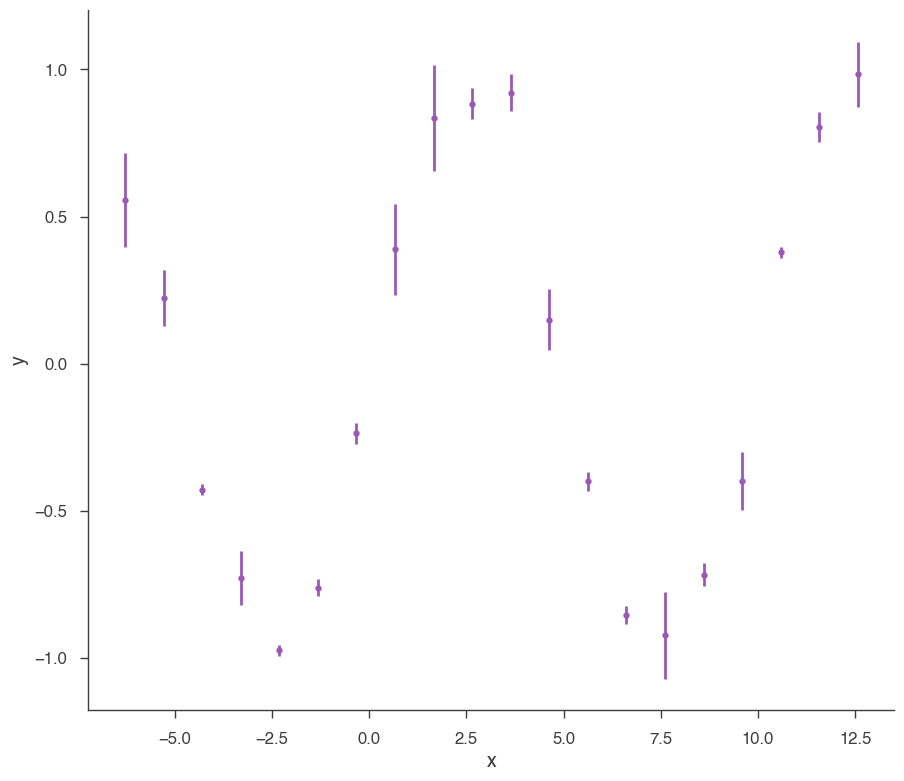

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=468847;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=862885;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:56:34 INFO      Mean acceptance fraction: 0.7152                                            ]8;id=317882;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=854647;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:56:36 INFO      fit restored to maximum of posterior                                         ]8;id=646677;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=261670;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=936081;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=180358;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 -0.0027 +0.0026) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.275628
total,-11.275628


Values of statistical measures:

,statistical measures
AIC,27.257138
BIC,28.542720
DIC,26.566857
PDIC,2.007440


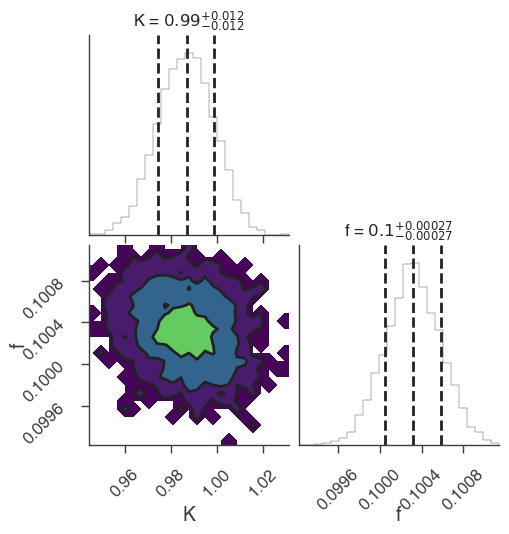

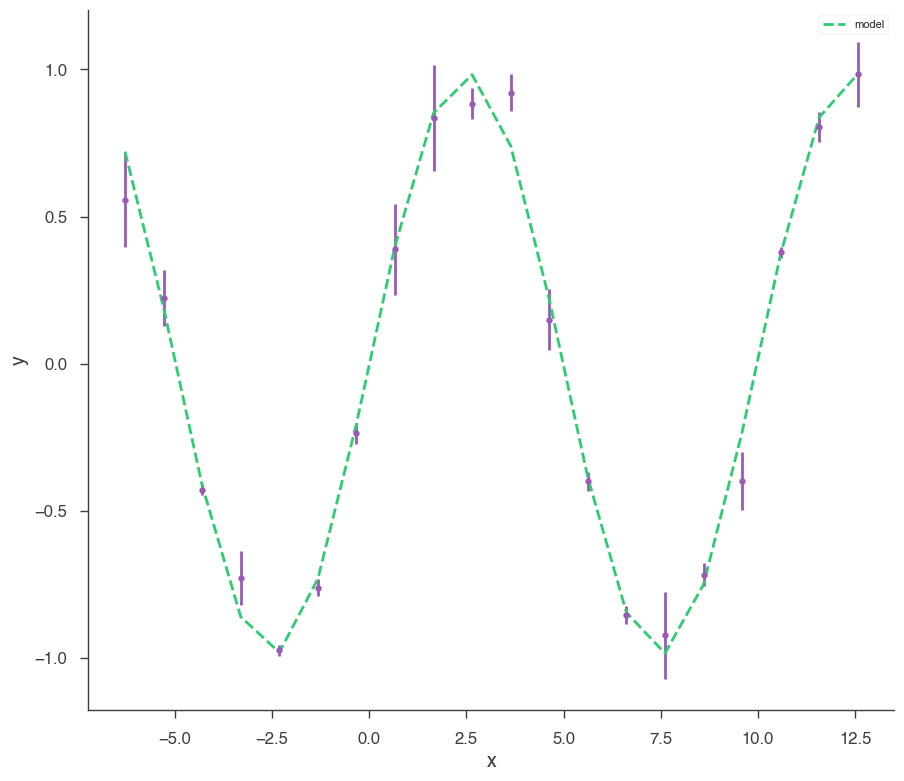

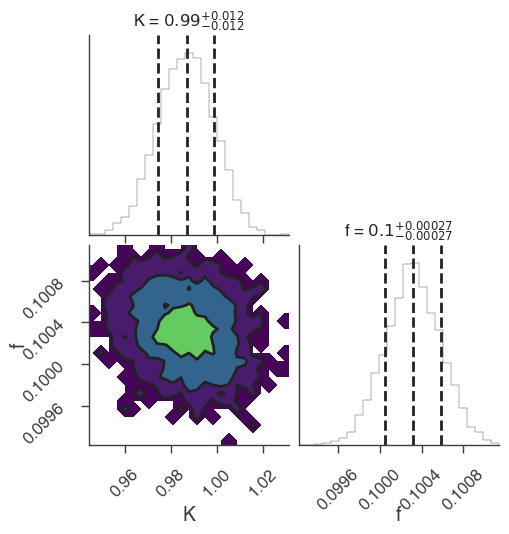

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:56:37 INFO      sampler set to multinest                                                ]8;id=446062;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=582507;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -21.692180135263889      +/-  0.15325366254396836     
 Total Likelihood Evaluations:         6393
 Sampling finished. Exiting MultiNest



22:56:38 INFO      fit restored to maximum of posterior                                         ]8;id=247843;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=230377;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=85457;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=890834;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.86 +/- 0.13) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0033 -0.0025 +0.0028) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.277877
total,-11.277877


Values of statistical measures:

,statistical measures
AIC,27.261637
BIC,28.547219
DIC,26.723882
PDIC,2.081718
log(Z),-9.420794


         INFO      deleting the chain directory chains                                     ]8;id=235703;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=107655;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

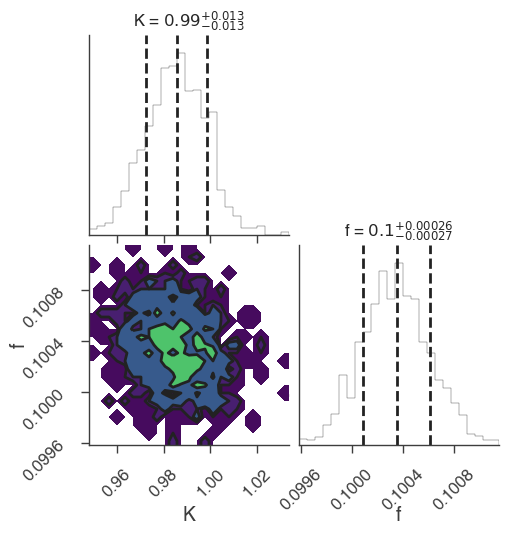

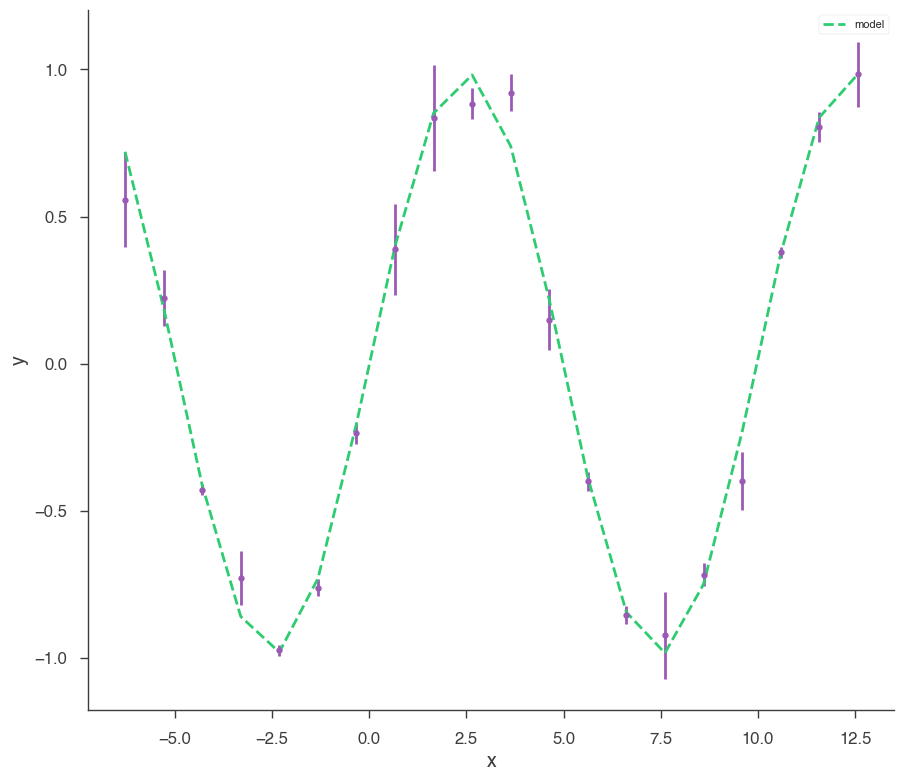

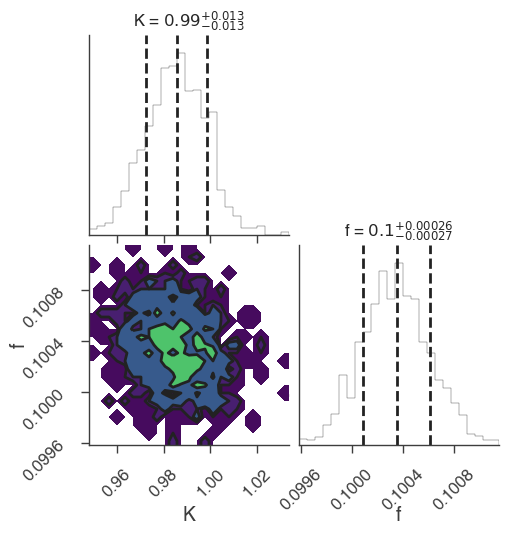

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

22:56:39 INFO      sampler set to dynesty_nested                                           ]8;id=198425;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=274394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

221it [00:00, 2207.24it/s, bound: 0 | nc: 5 | ncall: 698 | eff(%): 31.662 | loglstar:   -inf < -5841.117 <    inf | logz: -5848.335 +/-  0.133 | dlogz: 5831.765 >  0.409]

442it [00:00, 1789.63it/s, bound: 0 | nc: 3 | ncall: 1204 | eff(%): 36.711 | loglstar:   -inf < -4305.653 <    inf | logz: -4313.439 +/-  0.139 | dlogz: 4298.731 >  0.409]

626it [00:00, 1456.46it/s, bound: 0 | nc: 14 | ncall: 1915 | eff(%): 32.689 | loglstar:   -inf < -3602.965 <    inf | logz: -3610.833 +/-  0.135 | dlogz: 3590.277 >  0.409]

779it [00:00, 1008.03it/s, bound: 0 | nc: 3 | ncall: 2806 | eff(%): 27.762 | loglstar:   -inf < -3097.642 <    inf | logz: -3105.711 +/-  0.136 | dlogz: 3089.368 >  0.409] 

896it [00:00, 766.64it/s, bound: 0 | nc: 3 | ncall: 3790 | eff(%): 23.641 | loglstar:   -inf < -2626.612 <    inf | logz: -2635.533 +/-  0.149 | dlogz: 2688.403 >  0.409] 

988it [00:01, 713.07it/s, bound: 0 | nc: 3 | ncall: 4698 | eff(%): 21.030 | loglstar:   -inf < -2044.133 <    inf | logz: -2052.203 +/-  0.139 | dlogz: 2036.801 >  0.409]

1068it [00:01, 612.02it/s, bound: 0 | nc: 58 | ncall: 5936 | eff(%): 17.992 | loglstar:   -inf < -1529.621 <    inf | logz: -1538.365 +/-  0.142 | dlogz: 1524.072 >  0.409]

1136it [00:01, 595.37it/s, bound: 0 | nc: 3 | ncall: 6996 | eff(%): 16.238 | loglstar:   -inf < -1284.204 <    inf | logz: -1292.595 +/-  0.141 | dlogz: 1277.546 >  0.409] 

1199it [00:01, 526.52it/s, bound: 0 | nc: 22 | ncall: 8133 | eff(%): 14.742 | loglstar:   -inf < -1063.336 <    inf | logz: -1072.411 +/-  0.144 | dlogz: 1057.699 >  0.409]

1254it [00:01, 399.53it/s, bound: 0 | nc: 20 | ncall: 9591 | eff(%): 13.075 | loglstar:   -inf < -924.366 <    inf | logz: -933.122 +/-  0.142 | dlogz: 917.841 >  0.409]   

1299it [00:01, 382.03it/s, bound: 0 | nc: 8 | ncall: 10551 | eff(%): 12.312 | loglstar:   -inf < -801.337 <    inf | logz: -811.226 +/-  0.156 | dlogz: 798.776 >  0.409]

1340it [00:02, 282.83it/s, bound: 0 | nc: 17 | ncall: 11775 | eff(%): 11.380 | loglstar:   -inf < -726.584 <    inf | logz: -735.869 +/-  0.149 | dlogz: 720.941 >  0.409]

1373it [00:02, 256.63it/s, bound: 0 | nc: 5 | ncall: 12764 | eff(%): 10.757 | loglstar:   -inf < -672.734 <    inf | logz: -682.249 +/-  0.150 | dlogz: 667.350 >  0.409] 

1402it [00:02, 246.22it/s, bound: 0 | nc: 6 | ncall: 13878 | eff(%): 10.102 | loglstar:   -inf < -626.474 <    inf | logz: -636.247 +/-  0.149 | dlogz: 621.623 >  0.409]

1429it [00:02, 212.80it/s, bound: 1 | nc: 1 | ncall: 14167 | eff(%): 10.087 | loglstar:   -inf < -592.859 <    inf | logz: -603.098 +/-  0.159 | dlogz: 591.505 >  0.409]

1609it [00:02, 510.60it/s, bound: 1 | nc: 2 | ncall: 14450 | eff(%): 11.135 | loglstar:   -inf < -399.489 <    inf | logz: -409.017 +/-  0.148 | dlogz: 393.185 >  0.409]

1748it [00:03, 580.99it/s, bound: 2 | nc: 1 | ncall: 14750 | eff(%): 11.851 | loglstar:   -inf < -290.711 <    inf | logz: -301.511 +/-  0.159 | dlogz: 286.484 >  0.409]

1982it [00:03, 934.37it/s, bound: 2 | nc: 5 | ncall: 15070 | eff(%): 13.152 | loglstar:   -inf < -182.981 <    inf | logz: -192.740 +/-  0.148 | dlogz: 175.599 >  0.409]

2119it [00:03, 866.15it/s, bound: 3 | nc: 1 | ncall: 15350 | eff(%): 13.805 | loglstar:   -inf < -138.046 <    inf | logz: -147.563 +/-  0.147 | dlogz: 129.985 >  0.409]

2314it [00:03, 1094.14it/s, bound: 3 | nc: 2 | ncall: 15641 | eff(%): 14.794 | loglstar:   -inf < -89.237 <    inf | logz: -99.096 +/-  0.151 | dlogz: 82.059 >  0.409]  

2455it [00:03, 875.60it/s, bound: 4 | nc: 1 | ncall: 15957 | eff(%): 15.385 | loglstar:   -inf < -67.072 <    inf | logz: -77.251 +/-  0.151 | dlogz: 59.855 >  0.409] 

2631it [00:03, 1051.29it/s, bound: 4 | nc: 1 | ncall: 16178 | eff(%): 16.263 | loglstar:   -inf < -48.870 <    inf | logz: -58.716 +/-  0.150 | dlogz: 40.796 >  0.409]

2774it [00:03, 1134.80it/s, bound: 4 | nc: 2 | ncall: 16466 | eff(%): 16.847 | loglstar:   -inf < -38.234 <    inf | logz: -48.074 +/-  0.150 | dlogz: 29.802 >  0.409]

2908it [00:04, 984.72it/s, bound: 5 | nc: 1 | ncall: 16669 | eff(%): 17.446 | loglstar:   -inf < -30.806 <    inf | logz: -41.148 +/-  0.153 | dlogz: 22.549 >  0.409] 

3105it [00:04, 1201.10it/s, bound: 5 | nc: 4 | ncall: 17029 | eff(%): 18.234 | loglstar:   -inf < -22.870 <    inf | logz: -33.068 +/-  0.152 | dlogz: 13.952 >  0.409]

3245it [00:04, 946.49it/s, bound: 6 | nc: 1 | ncall: 17264 | eff(%): 18.796 | loglstar:   -inf < -19.485 <    inf | logz: -29.626 +/-  0.151 | dlogz: 10.151 >  0.409] 

3406it [00:04, 1082.33it/s, bound: 6 | nc: 1 | ncall: 17521 | eff(%): 19.440 | loglstar:   -inf < -16.852 <    inf | logz: -27.058 +/-  0.151 | dlogz:  7.260 >  0.409]

3535it [00:04, 842.99it/s, bound: 7 | nc: 2 | ncall: 17787 | eff(%): 19.874 | loglstar:   -inf < -15.441 <    inf | logz: -25.607 +/-  0.151 | dlogz:  5.486 >  0.409] 

3731it [00:04, 1059.17it/s, bound: 7 | nc: 3 | ncall: 18106 | eff(%): 20.606 | loglstar:   -inf < -13.743 <    inf | logz: -24.057 +/-  0.152 | dlogz:  3.478 >  0.409]

3864it [00:05, 750.56it/s, bound: 8 | nc: 1 | ncall: 18379 | eff(%): 21.024 | loglstar:   -inf < -13.144 <    inf | logz: -23.346 +/-  0.152 | dlogz:  2.500 >  0.409] 

4015it [00:05, 880.99it/s, bound: 8 | nc: 4 | ncall: 18588 | eff(%): 21.600 | loglstar:   -inf < -12.587 <    inf | logz: -22.797 +/-  0.152 | dlogz:  1.690 >  0.409]

4178it [00:05, 1029.12it/s, bound: 8 | nc: 4 | ncall: 18912 | eff(%): 22.092 | loglstar:   -inf < -12.176 <    inf | logz: -22.395 +/-  0.152 | dlogz:  1.087 >  0.409]

4310it [00:05, 909.70it/s, bound: 9 | nc: 1 | ncall: 19111 | eff(%): 22.552 | loglstar:   -inf < -11.943 <    inf | logz: -22.168 +/-  0.152 | dlogz:  0.755 >  0.409] 

4423it [00:05, 951.70it/s, bound: 9 | nc: 1 | ncall: 19311 | eff(%): 22.904 | loglstar:   -inf < -11.786 <    inf | logz: -22.024 +/-  0.152 | dlogz:  0.551 >  0.409]

4531it [00:05, 777.97it/s, +400 | bound: 9 | nc: 1 | ncall: 19936 | eff(%): 25.241 | loglstar:   -inf < -11.291 <    inf | logz: -21.567 +/-  0.152 | dlogz:  0.001 >  0.409]

22:56:45 INFO      fit restored to maximum of posterior                                         ]8;id=573246;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=911394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=28670;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=767242;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.86 -0.13 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0034 -0.0028 +0.0027) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.277163
total,-11.277163


Values of statistical measures:

,statistical measures
AIC,27.260209
BIC,28.545791
DIC,26.714836
PDIC,2.080277
log(Z),-9.366599


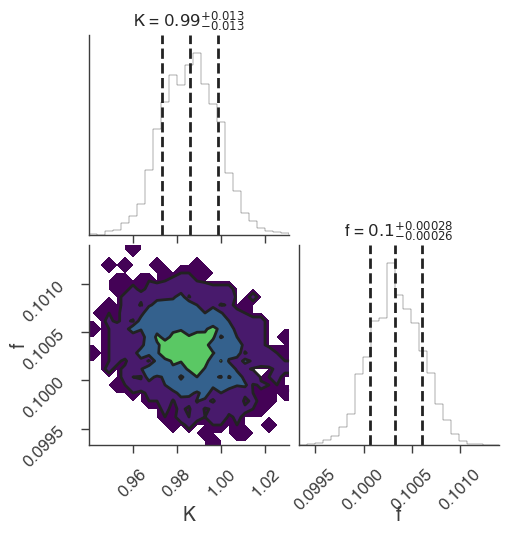

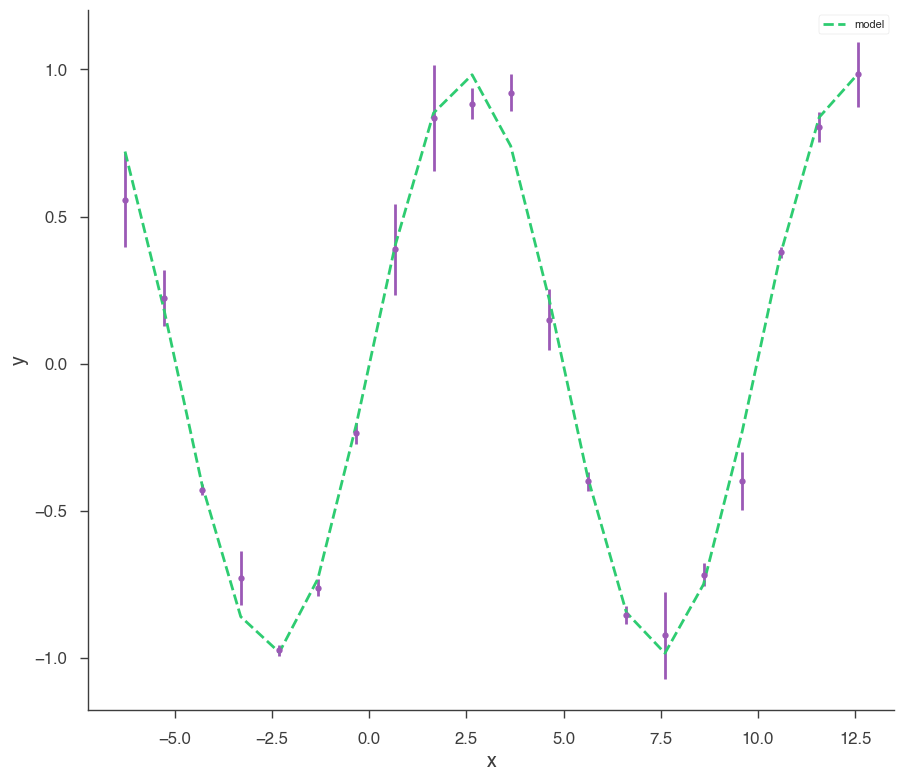

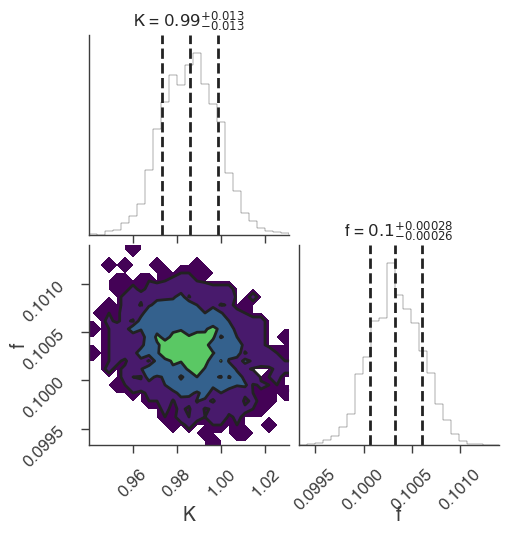

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

22:56:46 INFO      sampler set to dynesty_dynamic                                          ]8;id=221573;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=396808;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

73it [00:00, 728.29it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 77 | eff(%): 12.652 | loglstar:   -inf < -9441.137 <    inf | logz: -9448.191 +/-  0.119 | dlogz: 9401.521 >  0.010]

234it [00:00, 1242.83it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 283 | eff(%): 29.885 | loglstar:   -inf < -6553.037 <    inf | logz: -6560.371 +/-  0.120 | dlogz: 6493.147 >  0.010]

377it [00:00, 1327.77it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 523 | eff(%): 36.852 | loglstar:   -inf < -5340.551 <    inf | logz: -5348.204 +/-  0.123 | dlogz: 5282.367 >  0.010]

511it [00:00, 1330.54it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 823 | eff(%): 38.624 | loglstar:   -inf < -4643.968 <    inf | logz: -4651.148 +/-  0.117 | dlogz: 4612.517 >  0.010]

645it [00:00, 1212.25it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1223 | eff(%): 37.435 | loglstar:   -inf < -4155.175 <    inf | logz: -4162.515 +/-  0.119 | dlogz: 4147.847 >  0.010]

773it [00:00, 1232.14it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1736 | eff(%): 34.571 | loglstar:   -inf < -3763.388 <    inf | logz: -3771.627 +/-  0.125 | dlogz: 3757.778 >  0.010]

898it [00:00, 1110.36it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2358 | eff(%): 31.421 | loglstar:   -inf < -3322.578 <    inf | logz: -3331.272 +/-  0.131 | dlogz: 3320.238 >  0.010]

1012it [00:00, 1027.96it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3161 | eff(%): 27.643 | loglstar:   -inf < -3078.292 <    inf | logz: -3086.729 +/-  0.125 | dlogz: 3071.563 >  0.010]

1118it [00:01, 919.45it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4114 | eff(%): 24.231 | loglstar:   -inf < -2812.093 <    inf | logz: -2821.074 +/-  0.131 | dlogz: 2806.816 >  0.010] 

1213it [00:01, 782.15it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5253 | eff(%): 21.085 | loglstar:   -inf < -2196.907 <    inf | logz: -2206.207 +/-  0.135 | dlogz: 2193.352 >  0.010]

1296it [00:01, 607.38it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6501 | eff(%): 18.512 | loglstar:   -inf < -1831.452 <    inf | logz: -1840.906 +/-  0.136 | dlogz: 1827.232 >  0.010]

1365it [00:01, 555.99it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7524 | eff(%): 17.011 | loglstar:   -inf < -1495.787 <    inf | logz: -1505.091 +/-  0.133 | dlogz: 1489.695 >  0.010]

1426it [00:01, 532.98it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 8584 | eff(%): 15.698 | loglstar:   -inf < -1289.868 <    inf | logz: -1299.620 +/-  0.139 | dlogz: 1288.051 >  0.010]

1483it [00:01, 411.84it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 9699 | eff(%): 14.541 | loglstar:   -inf < -1127.879 <    inf | logz: -1136.409 +/-  0.128 | dlogz: 1119.432 >  0.010]

1530it [00:02, 387.49it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 10616 | eff(%): 13.764 | loglstar:   -inf < -992.753 <    inf | logz: -1002.263 +/-  0.134 | dlogz: 986.271 >  0.010]  

1573it [00:02, 334.57it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 11444 | eff(%): 13.170 | loglstar:   -inf < -917.541 <    inf | logz: -926.721 +/-  0.129 | dlogz: 909.889 >  0.010] 

1610it [00:02, 281.86it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 12376 | eff(%): 12.504 | loglstar:   -inf < -850.683 <    inf | logz: -859.998 +/-  0.133 | dlogz: 843.386 >  0.010]

1641it [00:02, 262.64it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 13259 | eff(%): 11.927 | loglstar:   -inf < -795.230 <    inf | logz: -803.693 +/-  0.128 | dlogz: 786.176 >  0.010]

1669it [00:02, 236.93it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 13983 | eff(%): 11.524 | loglstar:   -inf < -774.882 <    inf | logz: -783.084 +/-  0.124 | dlogz: 765.426 >  0.010]

1694it [00:03, 202.87it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 14723 | eff(%): 11.128 | loglstar:   -inf < -752.164 <    inf | logz: -761.479 +/-  0.133 | dlogz: 744.528 >  0.010] 

1716it [00:03, 174.06it/s, batch: 0 | bound: 0 | nc: 72 | ncall: 15609 | eff(%): 10.652 | loglstar:   -inf < -726.439 <    inf | logz: -736.096 +/-  0.132 | dlogz: 719.153 >  0.010]

1735it [00:03, 127.69it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 16117 | eff(%): 10.441 | loglstar:   -inf < -689.811 <    inf | logz: -700.184 +/-  0.144 | dlogz: 689.416 >  0.010]

1750it [00:03, 128.93it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 16558 | eff(%): 10.259 | loglstar:   -inf < -672.356 <    inf | logz: -682.456 +/-  0.137 | dlogz: 666.107 >  0.010] 

1765it [00:03, 96.94it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 17148 | eff(%): 10.001 | loglstar:   -inf < -653.425 <    inf | logz: -662.848 +/-  0.134 | dlogz: 645.684 >  0.010]

1777it [00:04, 84.30it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17188 | eff(%): 10.046 | loglstar:   -inf < -638.313 <    inf | logz: -647.464 +/-  0.131 | dlogz: 629.932 >  0.010] 

1968it [00:04, 381.86it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17479 | eff(%): 10.946 | loglstar:   -inf < -467.249 <    inf | logz: -477.085 +/-  0.136 | dlogz: 461.271 >  0.010]

2156it [00:04, 454.47it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17927 | eff(%): 11.700 | loglstar:   -inf < -328.861 <    inf | logz: -338.743 +/-  0.135 | dlogz: 322.153 >  0.010]

2376it [00:04, 712.39it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18244 | eff(%): 12.676 | loglstar:   -inf < -222.183 <    inf | logz: -232.756 +/-  0.133 | dlogz: 215.968 >  0.010]

2478it [00:04, 696.96it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18448 | eff(%): 13.078 | loglstar:   -inf < -184.014 <    inf | logz: -193.682 +/-  0.133 | dlogz: 176.387 >  0.010]

2569it [00:05, 433.33it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18680 | eff(%): 13.394 | loglstar:   -inf < -157.186 <    inf | logz: -166.689 +/-  0.133 | dlogz: 149.161 >  0.010]

2753it [00:05, 625.53it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18903 | eff(%): 14.189 | loglstar:   -inf < -113.467 <    inf | logz: -123.134 +/-  0.133 | dlogz: 106.046 >  0.010]

2874it [00:05, 717.70it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19095 | eff(%): 14.667 | loglstar:   -inf < -91.737 <    inf | logz: -101.812 +/-  0.133 | dlogz: 84.788 >  0.010]  

2982it [00:05, 685.28it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19332 | eff(%): 15.036 | loglstar:   -inf < -76.020 <    inf | logz: -86.042 +/-  0.135 | dlogz: 68.787 >  0.010] 

3076it [00:06, 497.15it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19502 | eff(%): 15.378 | loglstar:   -inf < -65.995 <    inf | logz: -75.910 +/-  0.134 | dlogz: 58.442 >  0.010]

3307it [00:06, 778.85it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19852 | eff(%): 16.249 | loglstar:   -inf < -45.782 <    inf | logz: -55.542 +/-  0.134 | dlogz: 37.613 >  0.010]

3454it [00:06, 774.37it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20178 | eff(%): 16.704 | loglstar:   -inf < -37.916 <    inf | logz: -47.917 +/-  0.135 | dlogz: 29.709 >  0.010]

3656it [00:06, 1000.59it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20456 | eff(%): 17.446 | loglstar:   -inf < -28.308 <    inf | logz: -38.304 +/-  0.135 | dlogz: 19.677 >  0.010]

3805it [00:06, 1100.21it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20739 | eff(%): 17.915 | loglstar:   -inf < -24.047 <    inf | logz: -34.227 +/-  0.135 | dlogz: 15.299 >  0.010]

3945it [00:06, 929.73it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21009 | eff(%): 18.341 | loglstar:   -inf < -21.112 <    inf | logz: -31.154 +/-  0.135 | dlogz: 11.966 >  0.010] 

4201it [00:06, 1263.51it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21409 | eff(%): 19.175 | loglstar:   -inf < -17.171 <    inf | logz: -27.321 +/-  0.135 | dlogz:  7.616 >  0.010]

4360it [00:07, 1022.61it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21726 | eff(%): 19.617 | loglstar:   -inf < -15.525 <    inf | logz: -25.736 +/-  0.135 | dlogz:  5.716 >  0.010]

4546it [00:07, 1188.47it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21973 | eff(%): 20.229 | loglstar:   -inf < -14.187 <    inf | logz: -24.389 +/-  0.135 | dlogz:  4.023 >  0.010]

4694it [00:07, 1206.61it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22271 | eff(%): 20.614 | loglstar:   -inf < -13.423 <    inf | logz: -23.611 +/-  0.135 | dlogz:  2.981 >  0.010]

4836it [00:07, 909.32it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22512 | eff(%): 21.015 | loglstar:   -inf < -12.906 <    inf | logz: -23.067 +/-  0.135 | dlogz:  2.224 >  0.010] 

4951it [00:07, 840.38it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22674 | eff(%): 21.364 | loglstar:   -inf < -12.562 <    inf | logz: -22.724 +/-  0.135 | dlogz:  1.731 >  0.010]

5113it [00:07, 991.81it/s, batch: 0 | bound: 8 | nc: 5 | ncall: 22971 | eff(%): 21.784 | loglstar:   -inf < -12.168 <    inf | logz: -22.364 +/-  0.135 | dlogz:  1.213 >  0.010]

5232it [00:08, 531.97it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23228 | eff(%): 22.050 | loglstar:   -inf < -11.995 <    inf | logz: -22.159 +/-  0.135 | dlogz:  0.923 >  0.010]

5338it [00:08, 604.40it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23362 | eff(%): 22.370 | loglstar:   -inf < -11.860 <    inf | logz: -22.017 +/-  0.135 | dlogz:  0.726 >  0.010]

5511it [00:08, 789.55it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23632 | eff(%): 22.837 | loglstar:   -inf < -11.680 <    inf | logz: -21.840 +/-  0.135 | dlogz:  0.490 >  0.010]

5655it [00:08, 774.97it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23947 | eff(%): 23.132 | loglstar:   -inf < -11.594 <    inf | logz: -21.735 +/-  0.135 | dlogz:  0.356 >  0.010]

5895it [00:08, 1079.62it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24259 | eff(%): 23.810 | loglstar:   -inf < -11.472 <    inf | logz: -21.615 +/-  0.135 | dlogz:  0.211 >  0.010]

6084it [00:09, 1013.80it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24697 | eff(%): 24.146 | loglstar:   -inf < -11.413 <    inf | logz: -21.553 +/-  0.135 | dlogz:  0.141 >  0.010]

6337it [00:09, 1311.52it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25046 | eff(%): 24.806 | loglstar:   -inf < -11.366 <    inf | logz: -21.501 +/-  0.135 | dlogz:  0.083 >  0.010]

6515it [00:09, 1413.48it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25409 | eff(%): 25.146 | loglstar:   -inf < -11.345 <    inf | logz: -21.477 +/-  0.135 | dlogz:  0.057 >  0.010]

6685it [00:09, 1181.78it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25627 | eff(%): 25.587 | loglstar:   -inf < -11.327 <    inf | logz: -21.461 +/-  0.135 | dlogz:  0.041 >  0.010]

6898it [00:09, 1382.76it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26025 | eff(%): 26.006 | loglstar:   -inf < -11.313 <    inf | logz: -21.447 +/-  0.135 | dlogz:  0.026 >  0.010]

7062it [00:09, 1072.93it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26306 | eff(%): 26.345 | loglstar:   -inf < -11.306 <    inf | logz: -21.440 +/-  0.135 | dlogz:  0.019 >  0.010]

7266it [00:09, 1265.03it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26618 | eff(%): 26.794 | loglstar:   -inf < -11.301 <    inf | logz: -21.433 +/-  0.135 | dlogz:  0.013 >  0.010]

7623it [00:10, 1774.68it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27082 | eff(%): 27.884 | loglstar:   -inf < -11.294 <    inf | logz: -21.426 +/-  0.135 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7879it [00:11, 442.46it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27338 | eff(%): 28.821 | loglstar: -13.040 < -12.814 < -11.759 | logz: -21.421 +/-  0.139 | stop:  1.409]          

8109it [00:11, 575.74it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27669 | eff(%): 28.753 | loglstar: -13.040 < -12.367 < -11.759 | logz: -21.421 +/-  0.139 | stop:  1.409]

8288it [00:11, 677.46it/s, batch: 1 | bound: 2 | nc: 6 | ncall: 28041 | eff(%): 29.005 | loglstar: -13.040 < -12.043 < -11.759 | logz: -21.421 +/-  0.139 | stop:  1.409]

8459it [00:12, 678.94it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28258 | eff(%): 29.381 | loglstar: -13.040 < -11.838 < -11.759 | logz: -21.421 +/-  0.139 | stop:  1.409]

8832it [00:12, 1055.17it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28704 | eff(%): 30.528 | loglstar: -13.040 < -11.484 < -11.759 | logz: -21.421 +/-  0.139 | stop:  1.409]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9047it [00:12, 686.10it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28931 | eff(%): 31.271 | loglstar: -13.040 < -11.291 < -11.759 | logz: -21.421 +/-  0.139 | stop:  0.945] 

9047it [00:12, 707.60it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28931 | eff(%): 31.271 | loglstar: -13.040 < -11.291 < -11.759 | logz: -21.421 +/-  0.139 | stop:  0.945]

22:56:59 INFO      fit restored to maximum of posterior                                         ]8;id=568067;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=408842;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=26791;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=998102;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.86 +/- 0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0033 -0.0025 +0.0026) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.275661
total,-11.275661


Values of statistical measures:

,statistical measures
AIC,27.257205
BIC,28.542787
DIC,26.474303
PDIC,1.960709
log(Z),-9.306429


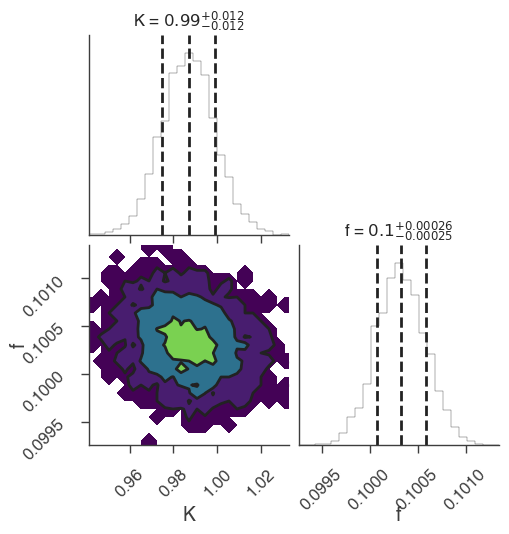

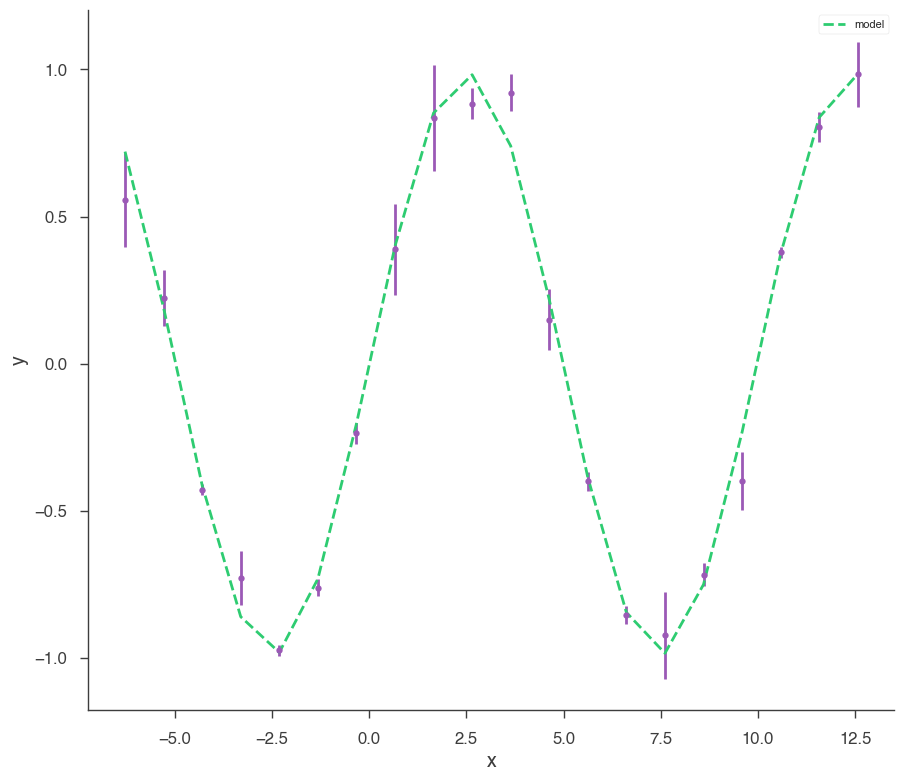

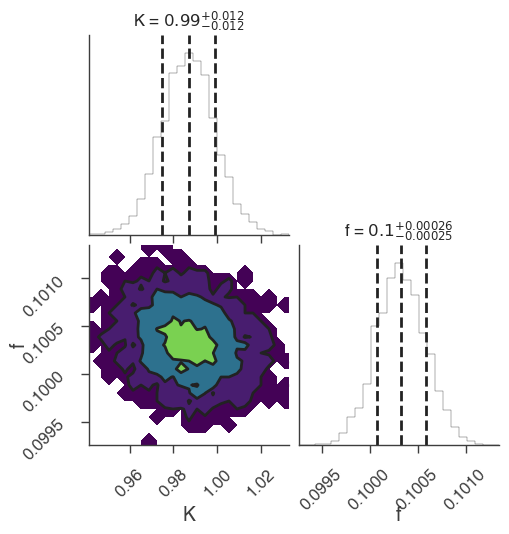

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

22:57:00 INFO      sampler set to zeus                                                     ]8;id=890341;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=283547;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 44.53it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:14, 42.27it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:13, 44.96it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:13, 45.70it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:12, 48.41it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:10, 53.86it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:10, 57.82it/s]

Sampling progress :   8%|▊         | 47/625 [00:00<00:09, 59.12it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:10, 54.61it/s]

Sampling progress :   9%|▉         | 59/625 [00:01<00:10, 55.98it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:10, 53.32it/s]

Sampling progress :  11%|█▏        | 71/625 [00:01<00:11, 47.79it/s]

Sampling progress :  12%|█▏        | 78/625 [00:01<00:10, 52.28it/s]

Sampling progress :  14%|█▍        | 86/625 [00:01<00:09, 58.04it/s]

Sampling progress :  15%|█▍        | 92/625 [00:01<00:09, 58.55it/s]

Sampling progress :  16%|█▌        | 99/625 [00:01<00:08, 61.17it/s]

Sampling progress :  17%|█▋        | 106/625 [00:01<00:08, 62.78it/s]

Sampling progress :  18%|█▊        | 114/625 [00:02<00:07, 65.36it/s]

Sampling progress :  19%|█▉        | 121/625 [00:02<00:07, 66.25it/s]

Sampling progress :  20%|██        | 128/625 [00:02<00:08, 61.29it/s]

Sampling progress :  22%|██▏       | 135/625 [00:02<00:08, 58.70it/s]

Sampling progress :  23%|██▎       | 141/625 [00:02<00:08, 55.97it/s]

Sampling progress :  24%|██▎       | 147/625 [00:02<00:08, 53.81it/s]

Sampling progress :  25%|██▍       | 155/625 [00:02<00:08, 58.69it/s]

Sampling progress :  26%|██▌       | 162/625 [00:02<00:07, 61.07it/s]

Sampling progress :  27%|██▋       | 169/625 [00:03<00:07, 57.69it/s]

Sampling progress :  28%|██▊       | 175/625 [00:03<00:08, 55.72it/s]

Sampling progress :  29%|██▉       | 181/625 [00:03<00:08, 51.92it/s]

Sampling progress :  30%|██▉       | 187/625 [00:03<00:08, 49.76it/s]

Sampling progress :  31%|███       | 194/625 [00:03<00:08, 52.87it/s]

Sampling progress :  32%|███▏      | 200/625 [00:03<00:08, 50.02it/s]

Sampling progress :  33%|███▎      | 206/625 [00:03<00:08, 49.53it/s]

Sampling progress :  34%|███▍      | 211/625 [00:03<00:08, 47.49it/s]

Sampling progress :  35%|███▌      | 219/625 [00:03<00:07, 54.72it/s]

Sampling progress :  36%|███▌      | 225/625 [00:04<00:07, 55.49it/s]

Sampling progress :  37%|███▋      | 231/625 [00:04<00:15, 25.26it/s]

Sampling progress :  38%|███▊      | 236/625 [00:04<00:17, 22.49it/s]

Sampling progress :  38%|███▊      | 240/625 [00:05<00:18, 20.70it/s]

Sampling progress :  40%|███▉      | 248/625 [00:05<00:13, 28.80it/s]

Sampling progress :  40%|████      | 253/625 [00:05<00:13, 28.17it/s]

Sampling progress :  41%|████▏     | 258/625 [00:05<00:11, 31.37it/s]

Sampling progress :  42%|████▏     | 262/625 [00:05<00:11, 31.73it/s]

Sampling progress :  43%|████▎     | 269/625 [00:05<00:09, 39.27it/s]

Sampling progress :  44%|████▍     | 274/625 [00:05<00:08, 39.68it/s]

Sampling progress :  45%|████▍     | 280/625 [00:06<00:11, 29.16it/s]

Sampling progress :  45%|████▌     | 284/625 [00:06<00:12, 28.18it/s]

Sampling progress :  46%|████▋     | 290/625 [00:06<00:09, 33.50it/s]

Sampling progress :  48%|████▊     | 297/625 [00:06<00:08, 40.84it/s]

Sampling progress :  48%|████▊     | 302/625 [00:06<00:08, 39.43it/s]

Sampling progress :  49%|████▉     | 307/625 [00:06<00:07, 40.23it/s]

Sampling progress :  50%|█████     | 313/625 [00:07<00:06, 44.70it/s]

Sampling progress :  51%|█████     | 319/625 [00:07<00:06, 48.31it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:07<00:06, 48.38it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:07<00:05, 53.60it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:07<00:04, 59.65it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:07<00:04, 64.31it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:07<00:04, 61.57it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:07<00:04, 62.08it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:07<00:04, 60.42it/s]

Sampling progress :  60%|██████    | 376/625 [00:08<00:03, 62.82it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:08<00:04, 58.76it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:08<00:03, 61.37it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:08<00:04, 51.54it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:08<00:04, 47.55it/s]

Sampling progress :  65%|██████▌   | 409/625 [00:08<00:04, 46.77it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:08<00:04, 51.11it/s]

Sampling progress :  68%|██████▊   | 424/625 [00:08<00:03, 57.18it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:09<00:03, 49.39it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:09<00:03, 53.76it/s]

Sampling progress :  71%|███████   | 443/625 [00:09<00:03, 52.25it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:09<00:03, 54.34it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:09<00:03, 55.16it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:09<00:02, 54.64it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:09<00:02, 59.69it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:09<00:02, 61.26it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:09<00:02, 64.84it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:10<00:02, 63.71it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:10<00:02, 61.46it/s]

Sampling progress :  81%|████████  | 506/625 [00:10<00:01, 63.42it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:10<00:01, 62.70it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:10<00:01, 62.73it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:10<00:01, 62.13it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:10<00:01, 62.35it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:10<00:01, 62.78it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:11<00:01, 63.28it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:11<00:01, 65.10it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:11<00:00, 64.09it/s]

Sampling progress :  91%|█████████ | 569/625 [00:11<00:00, 65.19it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:11<00:00, 65.33it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:11<00:00, 54.06it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:11<00:00, 49.80it/s]

Sampling progress :  95%|█████████▌| 596/625 [00:11<00:00, 54.07it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:12<00:00, 49.58it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:12<00:00, 48.41it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:12<00:00, 48.74it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:12<00:00, 51.01it/s]

Sampling progress : 100%|██████████| 625/625 [00:12<00:00, 50.00it/s]

22:57:13 INFO      fit restored to maximum of posterior                                         ]8;id=264045;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=633635;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=313518;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=558034;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 23


Scale Factor: 1.187984


Mean Integrated Autocorrelation Time: 3.1


Effective Sample Size: 4027.52


Number of Log Probability Evaluations: 65898


Effective Samples per Log Probability Evaluation: 0.061117


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 -0.13 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 +/- 0.0026) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.275647
total,-11.275647


Values of statistical measures:

,statistical measures
AIC,27.257176
BIC,28.542758
DIC,26.561836
PDIC,2.005011


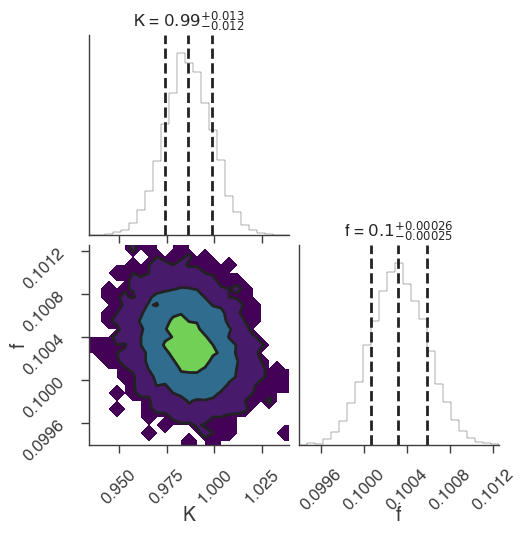

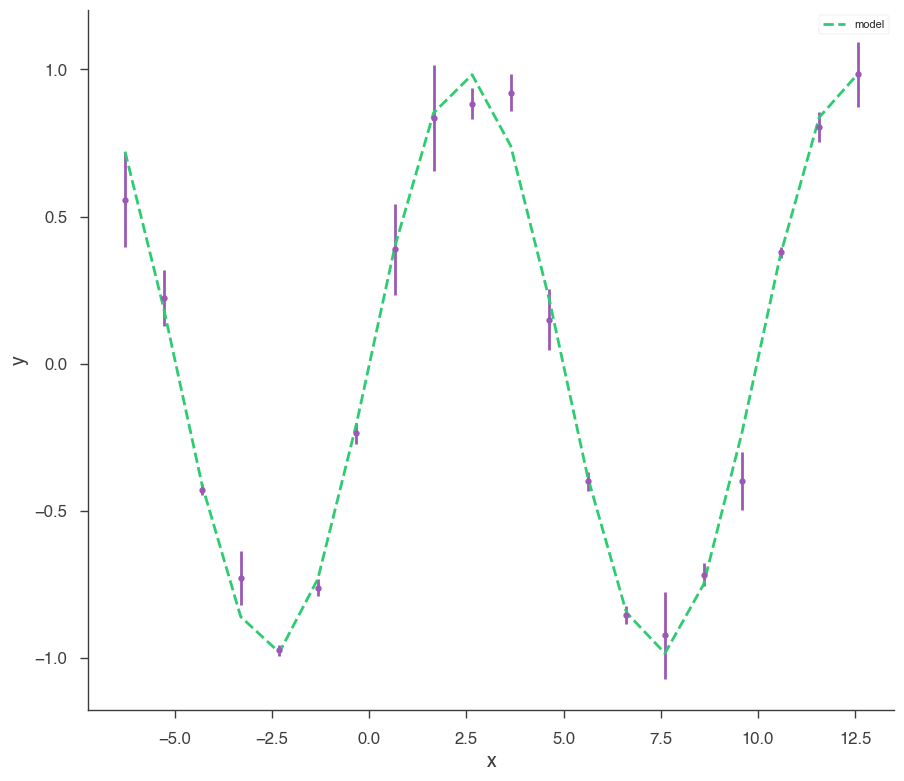

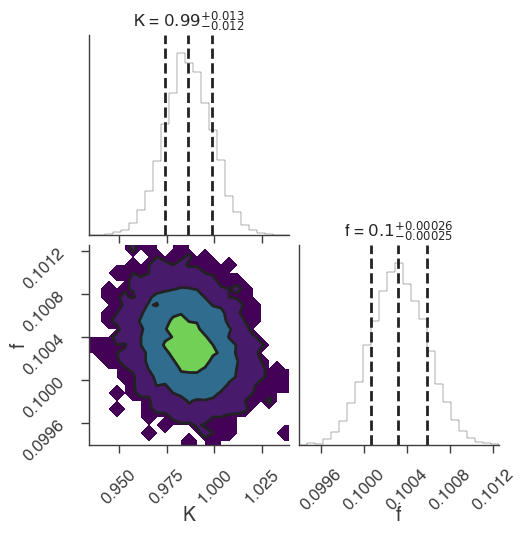

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:57:15 INFO      sampler set to ultranest                                                ]8;id=263064;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=440706;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 7591


[ultranest]   logZ = -21.56 +- 0.089


[ultranest] Effective samples strategy satisfied (ESS = 981.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.09 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


22:57:27 INFO      fit restored to maximum of posterior                                         ]8;id=998742;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=825385;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=784772;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=497639;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.85 -0.12 +0.13) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 -0.0025 +0.0027) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.280656
total,-11.280656


Values of statistical measures:

,statistical measures
AIC,27.267194
BIC,28.552776
DIC,26.657616
PDIC,2.052984
log(Z),-9.377168


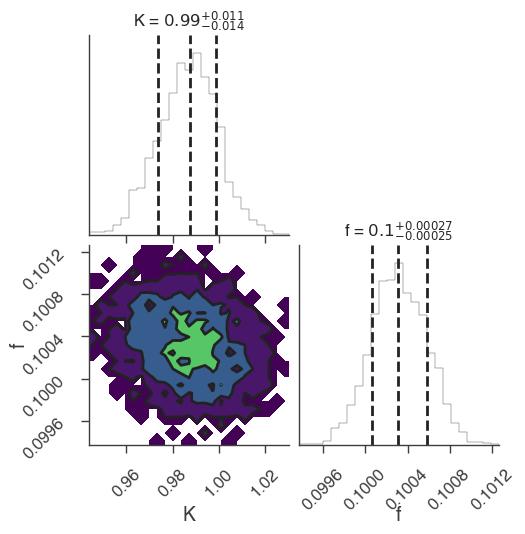

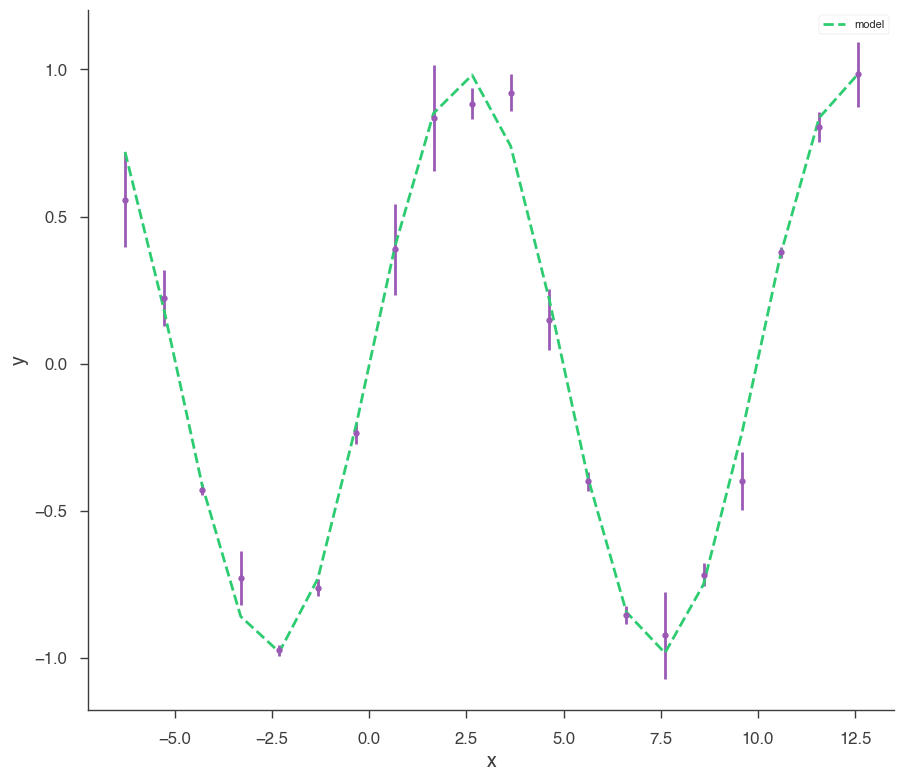

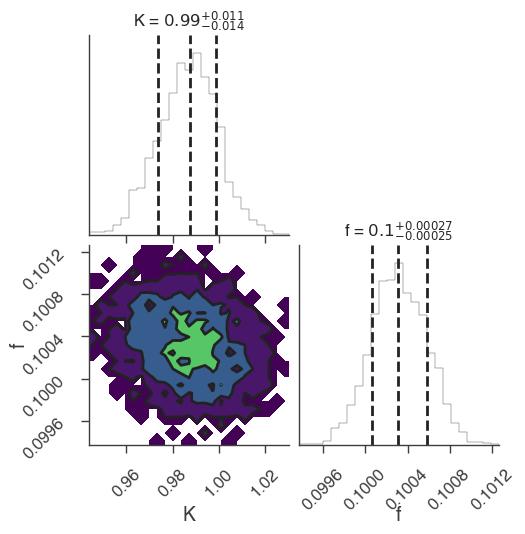

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()